In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

city = 'gdansk'
url = 'https://www.olx.pl/nieruchomosci/mieszkania/sprzedaz/{}/?page='.format(city)

columns = ['Title', 'Price', 'Sq_Footage', 'Price_Per_Meter']
df = pd.DataFrame(columns=columns)
cards = None

In [2]:
pages = 15
for page_index in range(pages):
	next_url = url + str(page_index + 1)
	response = requests.get(next_url)

	if response.status_code == 200:
		soup = BeautifulSoup(response.text, 'html.parser')
		cards = soup.find_all('div', {'data-cy': 'l-card'})

	for card in cards:
		# title = card.find('h6').text
		# print(title)
		try:
			title = card.find('h6').text
			price = card.find('p').text
			price = float(price[:price.index('z')].replace(' ', ''))
			sq_footage_data = card.find('span', {'class': 'css-643j0o'}).text
			sq_footage = float(sq_footage_data[:sq_footage_data.index('m') - 1].replace(',', '.'))
			price_per_meter = float(sq_footage_data[sq_footage_data.index('-') + 1 : sq_footage_data.index('z') - 1])
			
			df.loc[len(df)] = [title, price, sq_footage, price_per_meter]
		except:
			continue


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, 0 to 769
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            770 non-null    object 
 1   Price            770 non-null    float64
 2   Sq_Footage       770 non-null    float64
 3   Price_Per_Meter  770 non-null    float64
dtypes: float64(3), object(1)
memory usage: 30.1+ KB


In [4]:
df.head()

,Title,Price,Sq_Footage,Price_Per_Meter
0,3os. pokoje idealne dla rodziny lub na inwestycje,699000.0,63.0,11095.24
1,"4-pokoje mieszkanie 90m² z ogrodem, bez czynsz...",399000.0,90.0,4433.33
2,Duży balkon*Centrum*Zieleń*Cegła*Dwustronne,575000.0,53.0,10849.06
3,Wyjątkowe czteropokojowe mieszkanie Gdańsk,1120000.0,76.2,14698.16
4,"Dwupokojowe, Śródmieście, z wyposażeniem od zaraz",550000.0,36.0,15277.78


In [5]:
price_median = round(np.median(df['Price']), 2)
price_mean = round(np.mean(df['Price']), 2)
print('Price median: ', price_median)
print('Price mean: ', price_mean)

Price median:  650000.0
Price mean:  742183.87


In [6]:
# STARTING REGRESSION
m = df.shape[0]
print(m)

770


In [7]:
def plot(data, X, y, w=None, b=None):
	scatter_plot = sns.scatterplot(data=data, x=X, y=y, size=df['Price_Per_Meter'], alpha=0.5)
	scatter_plot.legend(title='Cena za metr')
	scatter_plot.set(xlabel='Metraż', ylabel='Cena')

	if w != None:
		plt.plot(np.arange(0, 1, 0.1), w * np.arange(0, 1, 0.1) + b, color='r')
	plt.show()

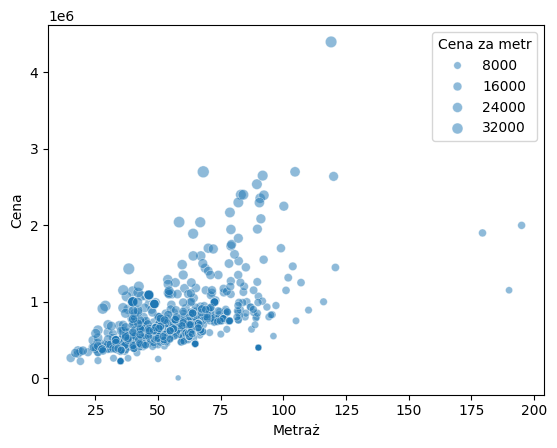

In [8]:
plot(df, df['Sq_Footage'], df['Price'])

In [9]:
def mean_squared_error(X, y, w, b):
	sum = 0
	for i in range(m):
		fw_b = w * X[i] + b
		sum += (fw_b - y[i]) ** 2
	return sum / (2 * m)

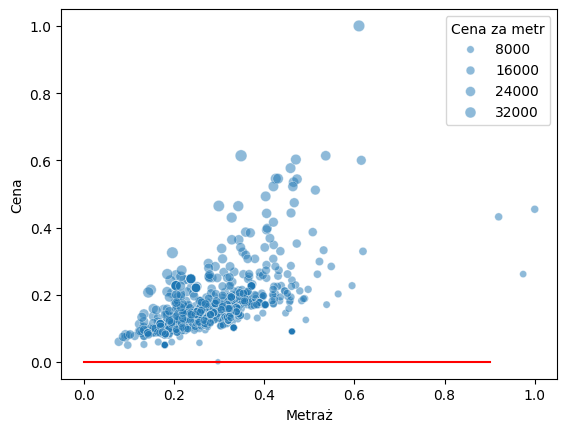

In [10]:
# COST FUNCTION (MEAN SQUARED ERROR)

X = df['Sq_Footage'].values
max_footage = np.max(X)
X = X / max_footage

y = df['Price'].values
max_price = np.max(y)
y = y / max_price

w = 0
b = 0

mean_squared_error(X, y, w, b)
plot(df, X, y, w, b)

In [11]:
# GRADIENT DESCENT

w = 0
b = 0

alpha = 0.1
for i in range(1000):
	w = w - alpha * (np.sum((w * X + b - y) * X) / m)
	b = b - alpha * (np.sum(w * X + b - y) / m)
print(w, b)

0.3281499185666354 0.07490639276295452


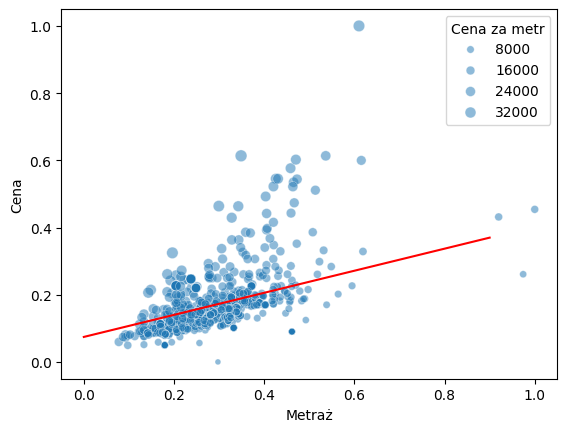

In [12]:
# PLOT AFTER GRADIENT DESCENT

plot(df, X, y, w, b)

In [13]:
# COME BACK TO PAST VALUES
X = X * max_footage
y = y * max_price

In [14]:
def predict(x):
	x = x / max_footage
	return (w * x + b) * max_price

In [15]:
first_row = df.iloc[0]
first_row

Title              3os. pokoje idealne dla rodziny lub na inwestycje
Price                                                       699000.0
Sq_Footage                                                      63.0
Price_Per_Meter                                             11095.24
Name: 0, dtype: object

In [16]:
square_footage = first_row['Sq_Footage']
predict(square_footage)

796065.8585501863

In [17]:
predict(37)

603551.2396577601